In [1]:
import numpy as np
import matplotlib.pyplot as plt

import quadrotor

def plotStates(state,t,u):
    plt.figure(figsize=[9,6])

    plt.subplot(2,3,1)
    plt.plot(t, state[0,:])
    plt.legend(['X'])

    plt.subplot(2,3,2)
    plt.plot(t, state[2,:])
    plt.legend(['Y'])

    plt.subplot(2,3,3)
    plt.plot(t, state[4,:])
    plt.legend(["theta"])

    plt.subplot(2,3,4)
    plt.plot(t, state[1,:])
    plt.legend(['Vx'])
    plt.xlabel('Time [s]')

    plt.subplot(2,3,5)
    plt.plot(t, state[3,:])
    plt.legend(['Vy'])
    plt.xlabel('Time [s]')

    plt.subplot(2,3,6)
    plt.plot(t, state[5,:])
    plt.legend(['omega'])
    plt.xlabel('Time [s]')

    # plt.savefig('Part4_Task1.jpg',bbox_inches='tight', dpi=150)

    plt.figure()
    plt.plot(t[:-1], u.T)
    plt.legend(['u1', 'u2'])
    plt.xlabel('Time [s]')

    # plt.savefig('Part4_Task1_control.jpg',bbox_inches='tight', dpi=150)
    plt.show()

def get_linearization(z, u):
    '''
    Args:
    z - the current state of the system at timestsep i
    u - the current control at timestsep i

    Returns:
    A, B - the matrices defining the linearization of the dynamics
    '''
    delt = quadrotor.DELTA_T
    m = quadrotor.MASS
    I = quadrotor.INERTIA
    l = quadrotor.LENGTH

    A = np.diag(np.ones(z.shape[0]))
    B = np.zeros((z.shape[0],u.shape[0]))

    A[0,1] = A[2,3] = A[4,5] = delt
    A[1,4] = (delt/m)*(-np.cos(z[4])*u[0]-np.cos(z[4])*u[1]) 
    A[3,4] = (delt/m)*(-np.sin(z[4])*u[0]-np.sin(z[4])*u[1])

    B[1,0] = B[1,1] = (delt/m)*(-np.sin(z[4]))
    B[3,0] = B[3,1] = (delt/m)*(np.cos(z[4]))
    B[5,0] = (delt/I)*(l)
    B[5,1] = (delt/I)*(-l)

    return A,B


def zeroPosControl(state, i=0):
    '''
    Args:
    state - the current state of the system at timestsep i

    Returns:
    The u0 and u1 such that the robot stays at a fixed position forever
    '''
    u = np.ones([2,])
    totalU = (quadrotor.MASS*quadrotor.GRAVITY)/np.cos(state[4])

    u[0] = totalU/2
    u[1] = totalU/2

    return u

horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, zeroPosState, zeroPosu = quadrotor.simulate(z0, zeroPosControl, horizon_length, disturbance = False)

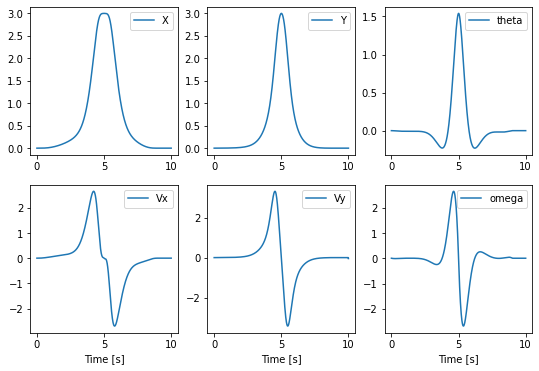

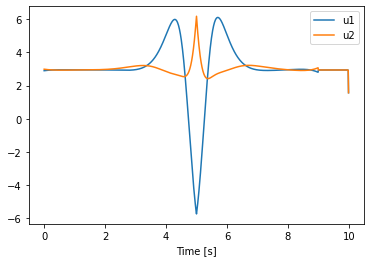

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAUmFtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Dd5liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAA5Kr/b71mP6Kb4AAAFdAC
shIkDRqBfetCvEAVUOaOCT/9nLr9mTKx/UEGXNIx5yzRp1ThzPF1a7cBOfoeV9rWW9MlXAV4nPOB
K25SkyW06uB3fGJd5HI2KNBsDdIF+b9+/fdQbFwnGMNpmshlYl+wRIMZD7cH//6bE0/3g3vKyzpp
XTF/l7Vjd4xJGGWc4SDm3qVqrCfh6GARnZE3/T/+7ihF1wtiO+PusNGcflxvs5VxV4MMZuUM/iiK
rzRZA5VD+S9Fxfoae1JPJ/ZKQDW3II0jKS1u5uU2zbGE8LDPeR/as/hLyO9PGoR1LuryvtSefCTI
1m2yJ2Z+CASgAAu4OlNSqA7Y3Jz+fKjY/yaAwuX1ba/gNpuUACHjQpctA6JADR5NeFI1Tjx0/20X
TDC4XB3hQaVZlo1GT5w8RD8Z5nQHe0GqqKHwrjS+1kaDJlJf8KWWyCp2DztAxQOBonsBIDINv8KR
TScAsN875ydG99mXpKX18trUsr0HdDXBNsevnDWzf+by7HaslpUcNkJRX/LfzFIQ7zST7jyfi55P
qvpUOHi6OCiXNtkuP13/j2N3qrknQClz5lG+xHRNo4Q7lvyjS6NJ4g4iCSE5qGLgulXhtXAruF79
lajYS4CWyBPzADfRlsvDFatySjGNOYaW0euQ5P3i7HQMcwQK9qFcRhZE/z4Rn2bYW1sYzztTk+VT
rh5RpsFNXdaeyfQH/ZGO5RpAR5GKyOMrrD3GFOF15IgQV5n3acUAAAMAtQmYzMiuXNtmAXUJSoJd
SpHArEcVC749O5Sb2hP9XLdLOhAU8MxPlFrqchk1/bzt+OWjbP8DUP+FdW7r1TiNHUHkuAcYYV+Z
r9LzNibTQVj0cmktRAijy+vzHaM6iM8D+nJ3fhx0orGBGXhtICKlMpj0569SMT/6QYJoJvARUrVk
0x4yzMUOtHGJdSuHtZt4QtaJwRwcMcX1oIWuVBdCDDO5Gi2kfuGqDwAwKUISM0dO5/VxWWnvzNsV
fXwFZsGcNjIphhvrPgMjufbx602h4rA+7vhJAN1Jf+lQNMEkF+PYSYF2f1vZVscrChbe/V+x/8gH
0yP5EeOdxWzaf94ClOlzrl2BCwVGAkeu+8cyWPIwZgAhl9fjAHiv87BrM3enJ6urIsdEnCawP8kO
oFQicNRR7E9f3mC7scJ8KthYxtihjjid5Px+YW9slIHAMsHYw8jTVT//uVo18U8BijN/XOodyrDR
twSkf9n+WZveDVzHEdm7RXlaB3vpahRnXN0bq9CjY4RjQloaVhDMPKbLF/igs6/S6xt+1sH9uKmm
gk8NGf8+QN9qEXjaViM8aaL4uoWs/DZZHJ69Oh+kfNipiIBFWPh74k/9Jgl5IP9Htyourvd4PsUF
zcAHQi9mwZ5+Hv/DF5d1ZjmstdLL40gKkt/1ID665ke26IrJBblqabVys56/mMbDwHp/3TfldnTd
TFr65GplgZB+kzvqCMTWWUePcZiCyf2tXEn9XYAAAAMAmDmku/ahRdW4t/BK03Y/JTwXCy0lY0Qu
SjdgkHUBSohKIgw3izhpDbbZKqxMM/RbPwTIdh1Yrhayv/wGZKubaxOBBfQXCSf8gB6aB/gs9XYX
mfW31K5o8/vkLSB6JYrsH1gUFcTzJWjbBeEsGtqspyGWt43k3eD7QRDhsC4zrMjPPja3KqKxozfv
ukgrWQTtiLF42aBqkJPQpTrswJNvLd3VhPqoAV88tnUfFK3PDXd//PoSzIl0jkQ5K+YyRZs8vEv9
ZC0jqTVc6kuZxLTswaI3Xlq7XkgodadP79EFlFCqxi0KUTrkW1bTeQtwdj4kYCiFg6vKWRMxJxJL
MxK6jRcMPdB04oVfSWbu5i2Umc5Uw2d2b0cmnzU8EmOZ0qsnVy2EiBSS94FgefdGBpiaXMrlsnLk
OhXatq+ozl78A9b6Yjstrku+48KFI+hTG6yBSIW2kAyecj7F+L0IT+x0m3mZ51yzutri+NkLKakd
FBgFRd3S3/Hvx1xUbKP0qRh6JyJ9uNGps89NajCA/cESuj8DJQdG/WNzzdW1QMjTUcWtqGU4WT+N
kVZpWnIbV58h42f8Z8VqwtLmUEcg9kpdhR0wQnv0ibV7f6B5EW7to8WVIA9Da9Uy11i6z/CI7D0Z
HikAcIWFIQGtXVHz2niLfNuGvCjm+89oiSrgAAADATgAADBkiLMVyK9IeWsLn1yqkq5+2p3D/1A1
pRo4krPe1bqtLZjmqcVw4YfEd2xiTZM1JMm2sMXW8odzlQ7rAoNU1BRYDzFzNKJ5RZpZfwhS/Ifp
KCOIncin4AA2u2sK5QqjoxzTc4SyOrD38/4KbJ+uUEIyceGWuaXpBszQuYVZu/oHrJmclIhjTP/+
+lUCsLBjbDjbxvX9cLVAsn/HTzms//lphFiTViA1/Jjh5d3RJJ3ou4tesBesWL+8F6Xe8LPEKgwh
ZzpDQAl+N8rMbZlmjE2VugftCu4MO/ggImlMKuHTxV9mgh0eyJQhnJjENJLyG5+qt/rEI1M6zvlx
qqrO9c0H9iOF/SFo81yAB0meU8+VMFqbMBpuSnXcCVRXcG0vhUCvkoFBb0Bzq8Z39kNoDDdj/8ls
dHtUYfmcZAzx+CoXQD/wZ1L8+kNvkoKQAwo0J8F2y0ltaAqXV8VHOgwCcYWzSKvMvMv8p2NPh0Cj
7WquXiuDCgUA0xCdej+Hj7nuG8rmj4g7v0ABL+lO3gYpJM+r53fsjyPZCeoti/wUvxedMf7/kdLh
0bhQVNYSVPIHa/QkM5HQz6NEd+d7C4jc+jVcGvgVUaSMwdgPi8nHFxVviNY/dFP8TfDO6Hvyxw9G
9JXmkVNjRb88wXn/BwfJF

In [2]:
###################################
# Initialising Variables for tuning the cost function
###################################
terminalCOst = 100000
timeSteps = [0.5,0.501,0.9]
desiredArray = np.array(([3,0,3,0,np.pi/2,0]))

list_of_Q = []
list_of_z_des = []#Z desired, this array is subtracted from the current z to get the error
list_of_R = []
horizon = 1000


###################################
# Tuning Q and R for the Cost function 
###################################
for i in range(horizon):

    if i<horizon*timeSteps[0]:
    #z desired is zero when we want the quadrotor at the origin
        list_of_z_des.append(np.zeros([quadrotor.NUMBER_STATES,]))
        list_of_Q.append(np.eye(quadrotor.NUMBER_STATES))
        list_of_R.append(np.eye(quadrotor.NUMBER_CONTROLS))

    if i<horizon*timeSteps[1] and i>=horizon*timeSteps[0]:
        #z desired is desiredArray when we want the quadrotor to be at (3,3) theta = pi/2
        list_of_z_des.append(desiredArray)
        list_of_Q.append(terminalCOst*np.eye(quadrotor.NUMBER_STATES))
        list_of_R.append(np.eye(quadrotor.NUMBER_CONTROLS))

    if i>=horizon*timeSteps[1] and i<horizon*timeSteps[2]:
    #z desired is zero when we want the quadrotor at the origin
        list_of_z_des.append(np.zeros([quadrotor.NUMBER_STATES,]))
        list_of_Q.append(np.eye(quadrotor.NUMBER_STATES))
        list_of_R.append(np.eye(quadrotor.NUMBER_CONTROLS))

    if i>=horizon*timeSteps[2]:
    #z desired is zero when we want the quadrotor at the origin
        list_of_z_des.append(np.zeros([quadrotor.NUMBER_STATES,]))
        list_of_Q.append(terminalCOst*np.eye(quadrotor.NUMBER_STATES))
        list_of_R.append(np.eye(quadrotor.NUMBER_CONTROLS))


def compute_cost(z,u, horizon_length):
    '''
    Args:
    z is the dynamics of the system integrated with the current control guess
    u is the current control guess
    horizon_length is the length of the horizon (1000 for 10 seconds)

    Returns:
    cost - the sumation of the cost for ever time step
    '''

    cost = 0

    for i in range(horizon_length):

        #cost = (z-zdes)^TQ(z-zdes) + uRu
        cost += np.asarray([z[:,i]-list_of_z_des[i]])@list_of_Q[i]@np.asarray([z[:,i]-list_of_z_des[i]]).T + np.asarray([u[:,i]])@list_of_R[i]@np.asarray(u[:,i]).T

    return cost

def get_quadratic_approximation(z,u, horizon_length):
    '''
    Args:
    z is the dynamics of the system integrated with the current control guess
    u is the current control guess
    horizon_length is the length of the horizon (1000 for 10 seconds)

    Returns:
    Q - The Hessian of the dynamics wrt the state
    q - The gradient of the dynamics wrt the state
    R - The Hessian of the dynamics wrt the control
    r - The gradient of the dynamics wrt the control
    '''

    q = np.zeros([quadrotor.NUMBER_STATES,horizon_length])
    Q  = np.zeros([quadrotor.NUMBER_STATES,quadrotor.NUMBER_STATES,horizon_length])

    r = np.zeros([quadrotor.NUMBER_CONTROLS,horizon_length])
    R  = np.zeros([quadrotor.NUMBER_CONTROLS,quadrotor.NUMBER_CONTROLS,horizon_length])

    for i in range(horizon_length):
        #q = 2Q(z-zdes)
        q[:,i] = np.reshape(2*list_of_Q[i]@np.asarray([z[:,i]-list_of_z_des[i]]).T,(quadrotor.NUMBER_STATES,))
        #Q = 2Q
        Q[:,:,i] = 2*list_of_Q[i]

        r[:,i] = np.reshape(2*list_of_R[i]@np.asarray([u[:,i]]).T,(quadrotor.NUMBER_CONTROLS,))
        R[:,:,i] = 2*list_of_R[i]   

    return Q,q,R,r


def solve_ricatti(Q,q,R,r,A,B,horizon):
    '''
    Args:
    Q - The Hessian of the dynamics wrt the state
    q - The gradient of the dynamics wrt the state
    R - The Hessian of the dynamics wrt the control
    r - The gradient of the dynamics wrt the control
    A, B - the matrices defining the linearization of the dynamics

    Returns:
    K_gains -  A list of gains
    K_feedforward - A list of feedforward controls for finding u
    '''
    N = horizon

    P = [np.zeros((Q[:,:,-1].shape))]*(N+1); P[N] = (Q[:,:,-1])
    p = [np.zeros(((q[:,-1]).shape))]*(N+1); p[N] = q[:,-1]

    temp  = (np.linalg.inv((-(((B.T@P[N])@B) + R[:,:,-1])))@(B.T@(P[N]@A)))
    K_gains = [np.zeros((temp.shape))]*N

    temp2 = (np.linalg.inv((-(((B.T@P[N])@B) + R[:,:,-1])))@((B.T@p[N])+ r[:,-1]))
    k_feedforward = [np.zeros((temp2.shape))]*N


    for i in reversed(range(N)):
        #Linearizing the dynamics at each time step and solving K and k
        A,B = get_linearization(integX[:,i],integU[:,i])
        
        myK = (np.linalg.inv((-(((B.T@P[i+1])@B) + R[:,:,i])))@(B.T@(P[i+1]@A)))
        K_gains[i] = (myK) 

        myP = Q[:,:,i] + (A.T@(P[i+1]@A)) + (A.T@(P[i+1]@(B@K_gains[i])))
        P[i] = (myP)

        my_k = (np.linalg.inv((-(((B.T@P[i+1])@B) + R[:,:,i])))@((B.T@p[i+1]) + r[:,i]))
        k_feedforward[i] = (my_k)
 
        my_p = q[:,i] + (A.T@(p[i+1])) + (A.T@(P[i+1]@(B@k_feedforward[i])))
        p[i] = my_p
    
    return K_gains,k_feedforward

###################################
# Solving iLQR
###################################

#Initial States and Guess
integU = zeroPosu
integX = zeroPosState
initCost = compute_cost(integX,integU, horizon)

numIters = 0
convergence = False
while(True):
    numIters += 1
    #Getting the Gradient and Hessian of the most recent cost
    Q,q,R,r = get_quadratic_approximation(integX,integU,horizon)

    ###################################
    # Solving the Backwards Ricatti equations
    ###################################
    
    #Setting up the parameters
    A,B = get_linearization(integX[:,0],integU[:,0])

    K_gains,k_feedforward = solve_ricatti(Q,q,R,r,A,B,horizon)
    
    ###################################
    # Performing Line Search
    ###################################
    alpha = 1
    while(True):
        myU = np.zeros_like(integU)
        z=np.zeros([quadrotor.NUMBER_STATES, horizon+1])
        z[:,0] = z0

        #Finding new control using the Solved Riccatti Equations output
        #Integrating Non linear dynamics using new control
        for i in range(horizon):
            myU[:,i] =  K_gains[i]@(z[:,i]-integX[:,i]) + alpha*k_feedforward[i] + integU[:,i]
            z[:,i+1] = quadrotor.get_next_state(z[:,i], myU[:,i])


        #Checking to see if cost has decreased
        newCost = compute_cost(z,myU, horizon)

        if newCost < initCost:

            if np.absolute(newCost - initCost)/initCost < 1e-6:
            #If the cost between iterations of the iLQR is below some threshold 
            #then Convergence has occured and we can break out of iLQR
                convergence = True
                outputX = z
                outputU = myU
                break
        #If cost has decreased then the cost and X and U are updated 
            initCost = newCost
            integX = z
            integU = myU
            break
        else:
        #If cost hasnt decreased we reduce alpha and check again
            alpha /= 2

        if alpha<0.01:
        #If cost hasnt decreased but we reach alpha==0.01 
        #X and U are updated and we break out of line search
            initCost = newCost
            integX = z
            integU = myU
            break

    if convergence==True:
    #If the algorithm converged on the optimal path
    #We break out of the entire iLQR loop
        break


# print(numIters)

#Making a function that returns the optimal control using the final computed K and k 
#Can be used with quadrotor.simulate() 
def iLQROut(z,i):
    #OutputX and outputU are the optimal control and state for the desired path
    #The control is then computed based on these and the real current state 
    u = K_gains[i]@(z-outputX[:,i]) + k_feedforward[i] + outputU[:,i]
    return u

##### Simulating Results ####
t, state, u = quadrotor.simulate(z0, iLQROut, horizon, disturbance = False)

plotStates(state,t,u)
quadrotor.animate_robot(state, u)